In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
df = pd.read_csv('heart_2020_cleaned.csv', header=0)
df_copy = df

# label to predict: heart disease
# header 0 to fix issue with selecting columns

# EDA

In [36]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [37]:
df['AgeCategory'].unique()

array(['55-59', '80 or older', '65-69', '75-79', '40-44', '70-74',
       '60-64', '50-54', '45-49', '18-24', '35-39', '30-34', '25-29'],
      dtype=object)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [39]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


<AxesSubplot:xlabel='PhysicalActivity', ylabel='count'>

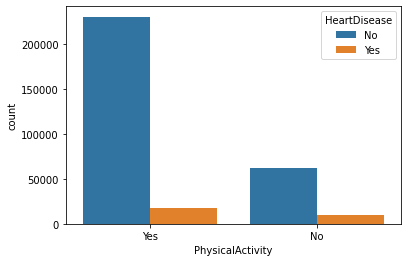

In [40]:
sns.countplot(hue='HeartDisease', x='PhysicalActivity', data=df)

# physical activity appears to lower risk

<AxesSubplot:xlabel='Smoking', ylabel='count'>

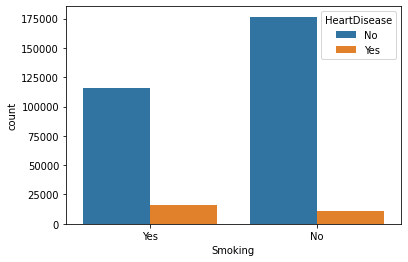

In [41]:
sns.countplot(hue='HeartDisease', x='Smoking', data=df)

# smoking elevates risk

<AxesSubplot:xlabel='SleepTime', ylabel='count'>

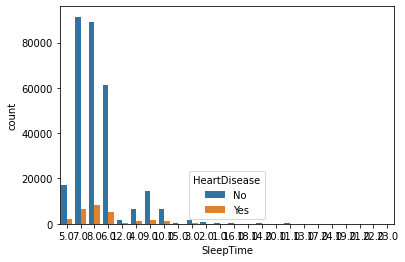

In [42]:
# sns.jointplot(x=df['SleepTime'], y=df['HeartDisease']))

# weird, looks like sleepTime is better interpreted as categorical data.

df['SleepTime'] = df['SleepTime'].astype(str)

sns.countplot(hue='HeartDisease', x='SleepTime', data=df)

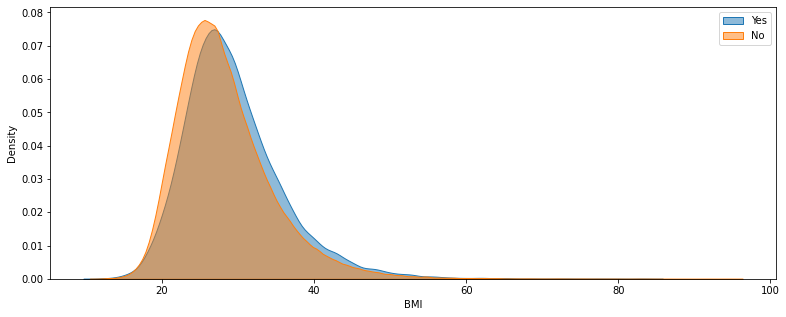

In [43]:
fig, ax = plt.subplots(figsize = (13,5))
sns.kdeplot(df[df["HeartDisease"]=="Yes"]["BMI"], alpha=0.5,shade = True, label='Yes', ax = ax)
sns.kdeplot(df[df["HeartDisease"]=="No"]["BMI"], alpha=0.5,shade = True, label='No', ax = ax)
ax.legend()

# clear trend of high BMI => higher heart disease risk.

# Feature Engineering


In [44]:
df_nums = df.select_dtypes(exclude='object') # numerical columns only
df_objs = df.select_dtypes(include='object') # categorical columns only
y = df['HeartDisease'] # target

In [45]:
df_objs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   HeartDisease      319795 non-null  object
 1   Smoking           319795 non-null  object
 2   AlcoholDrinking   319795 non-null  object
 3   Stroke            319795 non-null  object
 4   DiffWalking       319795 non-null  object
 5   Sex               319795 non-null  object
 6   AgeCategory       319795 non-null  object
 7   Race              319795 non-null  object
 8   Diabetic          319795 non-null  object
 9   PhysicalActivity  319795 non-null  object
 10  GenHealth         319795 non-null  object
 11  SleepTime         319795 non-null  object
 12  Asthma            319795 non-null  object
 13  KidneyDisease     319795 non-null  object
 14  SkinCancer        319795 non-null  object
dtypes: object(15)
memory usage: 36.6+ MB


In [46]:
# df.select_dtypes(include=['object'])
df_objs = pd.get_dummies(df_objs,columns=['HeartDisease','Smoking','AlcoholDrinking','Stroke','Sex','DiffWalking','PhysicalActivity','Asthma','KidneyDisease','SkinCancer'],drop_first=True)
df_objs = pd.get_dummies(df_objs,columns=['GenHealth','Race','AgeCategory','Diabetic','SleepTime'],drop_first=False)
df_objs

# Dummy Encoding the appropriate categorical data, and one hot encoding the rest.

,HeartDisease_Yes,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,Sex_Male,DiffWalking_Yes,PhysicalActivity_Yes,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes,...,SleepTime_22.0,SleepTime_23.0,SleepTime_24.0,SleepTime_3.0,SleepTime_4.0,SleepTime_5.0,SleepTime_6.0,SleepTime_7.0,SleepTime_8.0,SleepTime_9.0
0,0,1,0,0,0,0,1,1,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,1,0,0,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,1,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
319791,0,1,0,0,1,0,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0
319792,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
319793,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
df_nums.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   BMI             319795 non-null  float64
 1   PhysicalHealth  319795 non-null  float64
 2   MentalHealth    319795 non-null  float64
dtypes: float64(3)
memory usage: 7.3 MB


In [48]:
# scaling numerical data

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_nums = scaler.fit_transform(df_nums)
df_nums = pd.DataFrame(df_nums, columns=['BMI','PhysicalHealth','Mentalhealth'])

In [49]:
df = pd.concat([df_nums,df_objs],axis=1)
df.head()

,BMI,PhysicalHealth,Mentalhealth,HeartDisease_Yes,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,Sex_Male,DiffWalking_Yes,PhysicalActivity_Yes,...,SleepTime_22.0,SleepTime_23.0,SleepTime_24.0,SleepTime_3.0,SleepTime_4.0,SleepTime_5.0,SleepTime_6.0,SleepTime_7.0,SleepTime_8.0,SleepTime_9.0
0,-1.844750,-0.046751,3.281069,0,1,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,-1.256338,-0.424070,-0.490039,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,-0.274603,2.091388,3.281069,0,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0
3,-0.647473,-0.424070,-0.490039,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,-0.726138,3.097572,-0.490039,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,1,0


# Training

In [50]:
from sklearn.model_selection import train_test_split

X = df.drop('HeartDisease_Yes', axis=1)
y = df['HeartDisease_Yes']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size=.2, train_size = .8)

In [51]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, classification_report, confusion_matrix

def run_model(model, xtr, ytr):
    model = model
    model.fit(X=xtr, y=ytr)
    test_predictions = model.predict(X_test) 
    print('accuracy =',accuracy_score(y_test, test_predictions))
    print('recall = ',recall_score(y_test, test_predictions))
    print('precision = ',precision_score(y_test, test_predictions))
    print(classification_report(y_test, test_predictions))
    return test_predictions

# accuracy might be high because a naive model just predicts the majority class
# recall is the most important metric to look at in cases like disease detection
# where there is a high cost associated with false negatives (ie not detecting
# the disease).

In [52]:
from sklearn.naive_bayes import GaussianNB, ComplementNB
preds = run_model(GaussianNB(), X_train, y_train)
pd.DataFrame({'preds':preds, 'y_test':y_test}).value_counts()

# naive bayes is a popular choice for predicting based on medical data
# but it doesn't seem to be performing too well here
# (too many false positives. Not as bad as too many false negatives, but still)



accuracy = 0.6376897700089119
recall =  0.8565808297567954
precision =  0.176355804278193
              precision    recall  f1-score   support

           0       0.98      0.62      0.76     58367
           1       0.18      0.86      0.29      5592

    accuracy                           0.64     63959
   macro avg       0.58      0.74      0.52     63959
weighted avg       0.91      0.64      0.72     63959



preds  y_test
0      0         35996
1      0         22371
       1          4790
0      1           802
dtype: int64

In [53]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
preds = run_model(knn, X_train, y_train)

# hmm, even worse. Nice.

accuracy = 0.9048452915148767
recall =  0.10675965665236052
precision =  0.3536729857819905
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     58367
           1       0.35      0.11      0.16      5592

    accuracy                           0.90     63959
   macro avg       0.64      0.54      0.56     63959
weighted avg       0.87      0.90      0.88     63959



In [54]:
df['HeartDisease_Yes'].value_counts()

# data is pretty imbalanced. Let's try SMOTE to fix this and run the algos again
# note, will be lifting a fair bit of code for SMOTE and/or undersampling from
# internet sources since I don't have any experience with these

0    292422
1     27373
Name: HeartDisease_Yes, dtype: int64

In [55]:
# SMOTE
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

In [56]:
print(sum(y_train==1))
print(sum(y_train==0))
print(sum(y_train_res==1))
print(sum(y_train_res==0))

# Perfectly balanced as all things should be.

21781
234055
234055
234055


In [57]:
# lets run gaussian naive bayes again with the balanced data

preds = run_model(GaussianNB(), X_train_res, y_train_res)
pd.DataFrame({'preds':preds, 'y_test':y_test}).value_counts()

# whoops.

accuracy = 0.495411122750512
recall =  0.873211731044349
precision =  0.1339753614837984
              precision    recall  f1-score   support

           0       0.97      0.46      0.62     58367
           1       0.13      0.87      0.23      5592

    accuracy                           0.50     63959
   macro avg       0.55      0.67      0.43     63959
weighted avg       0.90      0.50      0.59     63959



preds  y_test
1      0         31564
0      0         26803
1      1          4883
0      1           709
dtype: int64

In [58]:
# ergh, KNN time.

knn = KNeighborsClassifier(n_neighbors = 5)
preds = run_model(knn, X_train_res, y_train_res)
pd.DataFrame({'preds':preds, 'y_test':y_test}).value_counts()

accuracy = 0.7487296549351928
recall =  0.5851216022889842
precision =  0.19221053868295834
              precision    recall  f1-score   support

           0       0.95      0.76      0.85     58367
           1       0.19      0.59      0.29      5592

    accuracy                           0.75     63959
   macro avg       0.57      0.67      0.57     63959
weighted avg       0.88      0.75      0.80     63959



preds  y_test
0      0         44616
1      0         13751
       1          3272
0      1          2320
dtype: int64

In [59]:
# might as well try decision tree

from sklearn import tree
dtc = tree.DecisionTreeClassifier(random_state=0)
preds = run_model(dtc, X_train_res, y_train_res)
pd.DataFrame({'preds':preds, 'y_test':y_test}).value_counts()

accuracy = 0.8252161540987195
recall =  0.3093705293276109
precision =  0.19122361003647617
              precision    recall  f1-score   support

           0       0.93      0.87      0.90     58367
           1       0.19      0.31      0.24      5592

    accuracy                           0.83     63959
   macro avg       0.56      0.59      0.57     63959
weighted avg       0.87      0.83      0.84     63959



preds  y_test
0      0         51050
1      0          7317
0      1          3862
1      1          1730
dtype: int64

In [60]:
# lets try undersampling the train data using the nearmiss algo now

from imblearn.under_sampling import NearMiss
undersam = NearMiss()
  
X_train_under, y_train_under = undersam.fit_resample(X_train, y_train)

In [61]:
print(sum(y_train==1))
print(sum(y_train==0))
print(sum(y_train_under==1))
print(sum(y_train_under==0))

21781
234055
21781
21781


In [62]:
# gaussian again, with undersampled data this time

preds = run_model(GaussianNB(), X_train_under, y_train_under)
pd.DataFrame({'preds':preds, 'y_test':y_test}).value_counts()

accuracy = 0.3647961975640645
recall =  0.6782904148783977
precision =  0.08899368855728397
              precision    recall  f1-score   support

           0       0.92      0.33      0.49     58367
           1       0.09      0.68      0.16      5592

    accuracy                           0.36     63959
   macro avg       0.50      0.51      0.32     63959
weighted avg       0.84      0.36      0.46     63959



preds  y_test
1      0         38828
0      0         19539
1      1          3793
0      1          1799
dtype: int64

In [63]:
# decision tree again, with undersampled data this time

preds = run_model(dtc, X_train_under, y_train_under)
pd.DataFrame({'preds':preds, 'y_test':y_test}).value_counts()

accuracy = 0.23022561328350974
recall =  0.8680257510729614
precision =  0.09098406747891284
              precision    recall  f1-score   support

           0       0.93      0.17      0.29     58367
           1       0.09      0.87      0.16      5592

    accuracy                           0.23     63959
   macro avg       0.51      0.52      0.23     63959
weighted avg       0.86      0.23      0.28     63959



preds  y_test
1      0         48496
0      0          9871
1      1          4854
0      1           738
dtype: int64

In [64]:
# seems like a gaussianNB model trained on original data is the "best"
# (relatively, they all seem bad to me oof) because highest recall
# KNN is out because it takes much longer.

"""
accuracy = 0.6376897700089119
recall =  0.8565808297567954
precision =  0.176355804278193
              precision    recall  f1-score   support

           0       0.98      0.62      0.76     58367
           1       0.18      0.86      0.29      5592

    accuracy                           0.64     63959
   macro avg       0.58      0.74      0.52     63959
weighted avg       0.91      0.64      0.72     63959

confusion matrix:
[[35996 22371]
 [  802  4790]]

preds  y_test
0      0         35996
1      0         22371
       1          4790
0      1           802
"""

'\naccuracy = 0.6376897700089119\nrecall =  0.8565808297567954\nprecision =  0.176355804278193\n              precision    recall  f1-score   support\n\n           0       0.98      0.62      0.76     58367\n           1       0.18      0.86      0.29      5592\n\n    accuracy                           0.64     63959\n   macro avg       0.58      0.74      0.52     63959\nweighted avg       0.91      0.64      0.72     63959\n\nconfusion matrix:\n[[35996 22371]\n [  802  4790]]\n\npreds  y_test\n0      0         35996\n1      0         22371\n       1          4790\n0      1           802\n'

[[35996 22371]
 [  802  4790]]


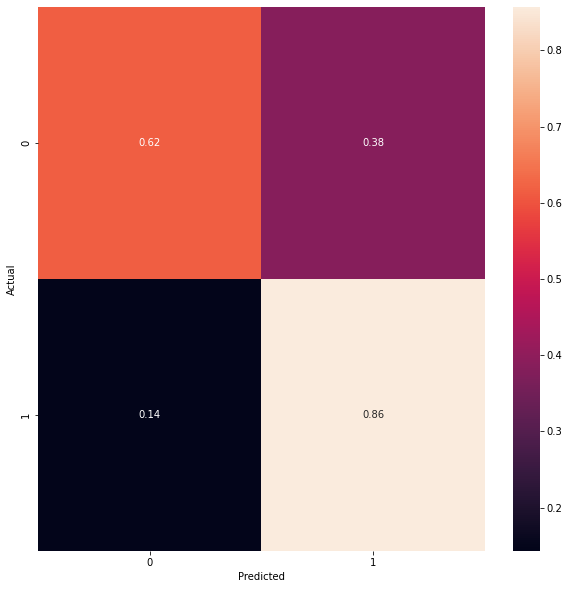

In [65]:
# confusion matrix for finalised model

model = GaussianNB()
model.fit(X=X_train, y=y_train)
test_predictions = model.predict(X_test) 

cm = confusion_matrix(y_test, test_predictions)
print(cm)
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=[0,1], yticklabels=[0,1])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)

In [66]:
import pickle
pickle.dump(model, open('model.pkl', 'wb'))